In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"

# Read dataset to pandas dataframe
datasetPandas = pd.read_csv(url)
# XPandas = datasetPandas.iloc[0:, :-1].transpose()
# yPandas = datasetPandas.iloc[0:, 4].transpose()
XPandas = datasetPandas.iloc[0:, :-1]
yPandas = datasetPandas.iloc[0:, 4]
X = XPandas.values
y = yPandas.values

XPandas.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [ ]:
print(XPandas.var().round(3).to_string())

Recency (months)              65.535
Frequency (times)             34.098
Monetary (c.c. blood)    2131094.230
Time (months)                594.224


In [ ]:
# Copy X_train and X_test into X_train_normed and X_test_normed
XPandas_normed= XPandas.copy()

# Specify which column to normalize
col_to_normalize = XPandas_normed.var().idxmax(axis=1)

# Log normalization
for df_ in [XPandas_normed]:
    # Add log normalized column
    df_['monetary_log'] = np.log(df_[col_to_normalize])
    # Drop the original column
    df_.drop(columns=col_to_normalize, inplace=True)

print(XPandas_normed.var().round(3).to_string())

XPandas_normed.head()

Recency (months)      65.535
Frequency (times)     34.098
Time (months)        594.224
monetary_log           0.836


,Recency (months),Frequency (times),Time (months),monetary_log
0,2,50,98,9.433484
1,0,13,28,8.086410
2,1,16,35,8.294050
3,2,20,45,8.517193
4,1,24,77,8.699515


In [ ]:
# # Create training and test splits
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# Feature scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)

# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
# print(XPandas.shape)
# print(yPandas.shape)
# print(X.shape)
# print(y.shape)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

(598, 4)
(150, 4)
(598,)
(150,)


In [ ]:
# df = pd.DataFrame(X_train,index=X_train[:,0])
# df = pd.DataFrame(X)
XPandas_normed = XPandas_normed.transpose()
corrMatrixPandas = XPandas_normed.corr()
# print(corrMatrixPandas)
# type(corrMatrixPandas)
corrMatrix = corrMatrixPandas.values # W
print(corrMatrix.shape)
print(corrMatrix)
# type(corrMatrix)

(748, 748)
[[1.         0.97099123 0.98472666 ... 0.71694339 0.23087357 0.24764505]
 [0.97099123 1.         0.99686935 ... 0.69958617 0.15362695 0.16138163]
 [0.98472666 0.99686935 1.         ... 0.73385821 0.21092666 0.2207664 ]
 ...
 [0.71694339 0.69958617 0.73385821 ... 1.         0.80750082 0.80750208]
 [0.23087357 0.15362695 0.21092666 ... 0.80750082 1.         0.99908668]
 [0.24764505 0.16138163 0.2207664  ... 0.80750208 0.99908668 1.        ]]


In [ ]:
from scipy.sparse import csgraph
laplacianMatrix = csgraph.laplacian(corrMatrix, normed=False)
# laplacianMatrix = csgraph.laplacian(corrMatrix, normed=True)

df_lp = pd.DataFrame(data=laplacianMatrix)
df_lp.head()
# print(laplacianMatrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747
0,419.387861,-0.970991,-0.984727,-0.990951,-0.974451,0.459631,-0.893150,-0.962339,-0.947687,-0.998131,-0.986365,-0.170031,-0.953319,-0.954503,-0.881467,-0.793635,-0.958187,-0.963176,-0.881467,0.053790,0.053790,-0.962199,-0.887410,-0.887410,-0.895367,-0.966069,-0.872963,-0.960039,-0.784313,-0.931752,-0.948915,-0.949855,-0.949855,-0.939741,-0.952136,-0.928995,-0.945437,-0.880799,-0.947882,-0.909342,...,-0.756362,-0.710507,-0.203651,-0.658456,-0.688180,-0.829669,-0.783292,-0.813092,-0.359530,-0.551806,-0.551806,-0.779915,-0.589818,-0.504394,-0.611208,-0.351741,-0.194595,-0.194595,-0.661827,-0.194595,-0.194595,-0.559882,-0.507908,-0.819923,-0.201951,-0.201951,-0.201951,-0.201951,-0.201951,-0.201951,-0.201951,-0.680930,-0.201951,-0.802752,-0.815585,-0.535148,-0.686925,-0.716943,-0.230874,-0.247645
1,-0.970991,442.203316,-0.996869,-0.989762,-0.975281,0.236934,-0.974669,-0.987446,-0.990966,-0.969112,-0.977393,-0.386928,-0.985197,-0.973840,-0.963489,-0.914584,-0.972376,-0.975072,-0.963489,-0.183170,-0.183170,-0.980107,-0.964079,-0.964079,-0.868677,-0.973536,-0.946177,-0.973417,-0.892345,-0.969269,-0.965010,-0.971887,-0.971887,-0.967037,-0.962463,-0.968001,-0.964227,-0.943033,-0.961751,-0.949837,...,-0.764625,-0.683777,-0.140867,-0.622018,-0.683525,-0.829251,-0.779817,-0.811819,-0.311539,-0.517027,-0.517027,-0.759299,-0.558996,-0.461924,-0.582718,-0.299264,-0.136577,-0.136577,-0.625068,-0.136577,-0.136577,-0.523144,-0.471983,-0.825124,-0.140063,-0.140063,-0.140063,-0.140063,-0.140063,-0.140063,-0.140063,-0.655789,-0.140063,-0.791283,-0.818294,-0.498644,-0.669464,-0.699586,-0.153627,-0.161382
2,-0.984727,-0.996869,452.615620,-0.997945,-0.987169,0.308969,-0.956756,-0.991127,-0.987959,-0.985069,-0.990484,-0.313255,-0.987376,-0.981580,-0.949836,-0.887202,-0.981684,-0.984523,-0.949836,-0.108536,-0.108536,-0.987183,-0.952989,-0.952989,-0.897420,-0.984291,-0.939304,-0.982768,-0.876125,-0.972332,-0.974868,-0.979186,-0.979186,-0.973516,-0.974138,-0.970763,-0.973466,-0.940751,-0.972613,-0.954298,...,-0.789720,-0.720941,-0.194676,-0.663372,-0.714922,-0.853870,-0.807510,-0.837513,-0.360836,-0.560288,-0.560288,-0.792254,-0.600419,-0.508069,-0.623026,-0.349791,-0.189199,-0.189199,-0.666421,-0.189199,-0.189199,-0.566789,-0.516308,-0.848439,-0.193651,-0.193651,-0.193651,-0.193651,-0.193651,-0.193651,-0.193651,-0.693386,-0.193651,-0.820575,-0.842615,-0.542675,-0.704686,-0.733858,-0.210927,-0.220766
3,-0.990951,-0.989762,-0.997945,460.235478,-0.992646,0.364792,-0.938280,-0.990007,-0.981447,-0.993273,-0.996718,-0.252545,-0.985143,-0.983954,-0.935212,-0.861851,-0.985297,-0.988181,-0.935212,-0.048653,-0.048653,-0.988892,-0.940470,-0.940470,-0.917559,-0.988977,-0.930514,-0.986390,-0.860393,-0.971139,-0.979066,-0.981261,-0.981261,-0.975051,-0.979785,-0.969355,-0.977203,-0.935713,-0.977652,-0.954538,...,-0.808236,-0.749512,-0.239738,-0.695684,-0.739056,-0.871362,-0.827892,-0.856024,-0.401459,-0.594890,-0.594890,-0.816885,-0.633293,-0.545280,-0.654859,-0.391430,-0.233375,-0.233375,-0.698705,-0.233375,-0.233375,-0.601639,-0.552052,-0.864969,-0.238547,-0.238547,-0.238547,-0.238547,-0.238547,-0.238547,-0.238547,-0.722535,-0.238547,-0.842071,-0.859996,-0.578001,-0.731893,-0.760069,-0.258574,-0.269946
4,-0.974451,-0.975281,-0.987169,-0.992646,502.678560,0.369408,-0.928937,-0.994424,-0.982059,-0.984134,-0.998081,-0.215842,-0.991516,-0.996364,-0.940764,-0.863106,-0.997725,-0.998680,-0.940764,-0.035823,-0.035823,-0.997468,-0.949040,-0.949040,-0.956194,-0.999352,-0.950076,-0.998108,-0.886095,-0.986638,-0.995471,-0.995002,-0.995002,-0.991562,-0.996440,-0.985407,-0.994315,-0.959419,-0.995227,-0.978291,...,-0.873575,-0.821994,-0.348788,-0.774228,-0.814820,-0.924227,-0.889442,-0.912148,-0.504871,-0.6848

In [ ]:
W_t = corrMatrix.transpose()
X_t = X.transpose()
print(W_t.shape)
print(X_t.shape)
print(laplacianMatrix.shape)
print(X.shape)
print(corrMatrix.shape)
A_reg = W_t.dot(laplacianMatrix)
B_reg = X_t.dot(X)
C_reg = W_t.dot(laplacianMatrix)
print(A_reg.shape)
print(B_reg.shape)
print(C_reg.shape)
reg = A_reg.dot(B_reg.dot(C_reg.dot(corrMatrix)))
print(reg.shape)
# print(reg)
regTerm = np.trace(reg) # R(W)
print(regTerm)
ho2=0.001
print(regTerm*ho2)

(748, 748)
(4, 748)
(748, 748)
(748, 4)
(748, 748)
(748, 748)
(4, 4)
(748, 748)


ValueError: ignored

In [ ]:
print(X.shape)
print(y.shape)
print(corrMatrix.shape)
print(X.dot(corrMatrix).shape)

(748, 4)
(748,)
(4, 4)
(748, 4)


In [ ]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.01)
reg.fit(X.dot(corrMatrix), X)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5603.820574483131, tolerance: 4.895496657754011
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50012.949679602396, tolerance: 44.38854799465241
  positive)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# print(reg.coef_.shape)
print(regTerm)
# print(reg.coef_)
print(ho2*regTerm)
# print(reg.coef_ - ho2*regTerm)

229674207.52050352
229674.20752050352


In [ ]:
# print(reg.coef_)
# target = reg.coef_- ho2*regTerm #Eq.7

df = pd.DataFrame(data=reg.coef_)
# print(target.shape)

# df = pd.DataFrame(data=target)
# print(target.shape)

In [ ]:
# Visualize data 
df.head()

,0,1,2,3
0,0.529300,0.087803,1.862594e-17,0.010738
1,-0.006134,0.002385,9.811713e-20,0.000722
2,-1.545094,0.593034,3.899551e-15,0.182219
3,1.164960,0.130650,0.000000e+00,0.141323


In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers, layers
import numpy as np

# number_of_inputs = 4*748
# number_of_inputs = 15

model = tf.keras.Sequential([
    tf.keras.Input(shape=(4)),
    layers.Dense(1, use_bias=False, kernel_regularizer=regularizers.l1(0.01))
])

model.compile(optimizer='sgd', loss='mse')

# a = np.array([1,0,3,0,5,0,7,0,0,0,0,0,0,0,0])
# N = 1000
# x = np.random.uniform(size=(N, number_of_inputs))
# print(x.shape)
# # print(a.shape)
# y = x @ a + np.random.normal(scale=1e-1, size=(N,)); 
# print(y.shape)

XW = X.dot(corrMatrix)
print(XW.shape)
print(X[:,0].shape)
X_fake = X[:,0]

# XW = X.dot(corrMatrix).flatten(order='F')
# X_flat = X.flatten(order='F')
# model.fit(XW, X_flat, epochs=200)

model.fit(XW, X_fake, epochs=200)

print(model.layers[0].get_config())
print(model.layers[0].get_weights())


(748, 4)
(748,)
Epoch 1/200
24/24 [==============================] - 0s 860us/step - loss: nan   
Epoch 2/200
24/24 [==============================] - 0s 864us/step - loss: nan
Epoch 3/200
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 4/200
24/24 [==============================] - 0s 934us/step - loss: nan
Epoch 5/200
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 6/200
24/24 [==============================] - 0s 793us/step - loss: nan
Epoch 7/200
24/24 [==============================] - 0s 804us/step - loss: nan
Epoch 8/200
24/24 [==============================] - 0s 966us/step - loss: nan
Epoch 9/200
24/24 [==============================] - 0s 881us/step - loss: nan
Epoch 10/200
24/24 [==============================] - 0s 826us/step - loss: nan
Epoch 11/200
24/24 [==============================] - 0s 925us/step - loss: nan
Epoch 12/200
24/24 [==============================] - 0s 879us/step - loss: nan
Epoch 13/200
24/24 [==============

In [ ]:
# Training
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predictions
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  1  0]
 [ 0  9  0]
 [ 0  2  4]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.75      1.00      0.86         9
 Iris-virginica       1.00      0.67      0.80         6

       accuracy                           0.90        30
      macro avg       0.92      0.87      0.87        30
   weighted avg       0.93      0.90      0.90        30



In [ ]:
# Extra: Comparing Error Rate with the K Value
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

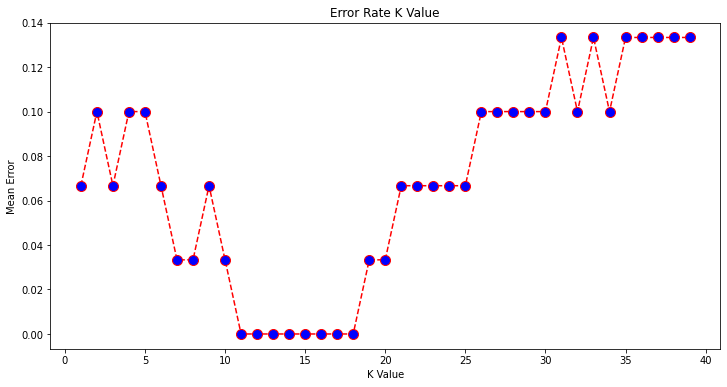

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

[Text(209.25, 203.85, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(136.01250000000002, 176.67000000000002, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(78.46875, 149.49, 'X[12] <= 6.597\ngini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(68.00625000000001, 122.31, 'X[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [4, 328]'),
 Text(41.85, 95.13, 'X[14] <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [2, 317]'),
 Text(20.925, 67.94999999999999, 'X[14] <= 0.003\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(10.4625, 40.77000000000001, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(31.387500000000003, 40.77000000000001, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(62.775000000000006, 67.94999999999999, 'X[21] <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [1, 311]'),
 Text(52.3125, 40.77000000000001, 'gini = 0.0\nsamples = 292\nvalue = [0, 292]'),
 Text(73.2375, 40.77000000000001, 'X[21] <= 33.56\ngini = 0.095\ns

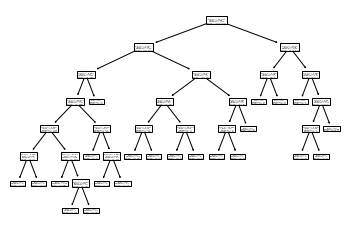

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn import tree
X, y = load_breast_cancer(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

tree.plot_tree(clf) 

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
print(lasso_reg.sparse_coef_.shape)
# lasso_reg.predict([[1.5]])

(1, 1)


In [ ]:
# # Importing libraries
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

# # Lasso Regression
# class LassoRegression:
#     def __init__(self, learning_rate, iterations, l1_penality):
#         self.learning_rate = learning_rate
#         self.iterations = iterations
#         self.l1_penality = l1_penality

#     # Function for model training
#     def fit(self, X, Y):
#         # no_of_training_examples, no_of_features
#         # self.m, self.n = X.shape
#         self.n, self.m = X.shape
#         # weight initialization
#         self.W = np.zeros(self.n)
#         self.b = 0
#         self.X = X
#         self.Y = Y
#         # gradient descent learning
#         for i in range(self.iterations):
#             self.update_weights()

#         return self

#     # Helper function to update weights in gradient descent
#     def update_weights(self):
#         Y_pred = self.predict(self.X)
#         # calculate gradients
#         dW = np.zeros(self.n)
#         print(f'dW shape: {dW.shape}')

#         for j in range(self.n):
#             if self.W[j] > 0:
#                 dW[j] = (
#                     -(2 * (self.X[:, j]).dot(self.Y - Y_pred)) + self.l1_penality
#                 ) / self.m
#             else:
#                 dW[j] = (
#                     -(2 * (self.X[:, j]).dot(self.Y - Y_pred)) - self.l1_penality
#                 ) / self.m

#         db = -2 * np.sum(self.Y - Y_pred) / self.m

#         # update weights
#         self.W = self.W - self.learning_rate * dW
#         self.b = self.b - self.learning_rate * db

#         return self

#     # Hypothetical function h( x )
#     def predict(self, X):
#         print(f'X shape: {X.shape}')
#         print(f'W shape: {self.W.shape}')
#         return X.dot(self.W) + self.b


In [ ]:
# # Importing libraries
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

# # Lasso Regression
# class LassoRegression:
#     def __init__(self, learning_rate, iterations, l1_penality):
#         self.learning_rate = learning_rate
#         self.iterations = iterations
#         self.l1_penality = l1_penality

#     # Function for model training
#     def fit(self, X, Y):
#         # no_of_training_examples, no_of_features
#         self.d, self.n = X.shape
#         # weight initialization
#         self.W = np.zeros(self.n)
#         # self.W = np.zeros(self.n)
#         # self.W = np.zeros((self.n,self.n))
#         self.b = 0
#         self.X = X
#         self.Y = Y
#         # flatten() and reshape(self.d,self.n)
#         # gradient descent learning
#         for i in range(self.iterations):
#             self.update_weights()

#         return self

#     # Helper function to update weights in gradient descent
#     def update_weights(self):
#         Y_pred = self.predict(self.X)
#         # calculate gradients
#         dW = np.zeros(self.n)
#         db = 0
#         # dW = np.zeros((self.n,self.n))
#         # print(f'dW shape: {dW.shape}')
#         # print(f'self.Y shape: {self.Y[:,0].shape}')
#         # print(f'Y_pred shape: {Y_pred.shape}')
#         # print(f'x: {self.X[0,:].shape}')
#         # print(f'y: {Y_err[0,:].shape}')
#         # print(f'n: {self.n}')
#         # print(f'd: {self.d}')
#         # print(f'res:{(-(2 * (self.X[0, :]).dot(Y_err[0,:])) + self.l1_penality) / self.n}')

#         for j in range(self.n):
#           if self.W[j] > 0:
              
#               if j == 747:
#                   print(f'j_if: {j}')
              
#               dW[j] = (
#               -(2 * (self.X[:,j]).dot(self.Y[:,j] - Y_pred)) + self.l1_penality
#               ) / self.n
#               db += -2 * np.sum(self.Y[:,j] - Y_pred) / self.n
#           else:
#               if j == 747:
#                   print(f'j_else: {j}')
              
#               dW[j] = (
#                   -(2 * (self.X[:,j]).dot(self.Y[:,j] - Y_pred)) - self.l1_penality
#               ) / self.n
#               db += -2 * np.sum(self.Y[:,j] - Y_pred) / self.n

#         # db = -2 * np.sum(self.Y - Y_pred) / self.n

#         # update weights
#         self.W = self.W - self.learning_rate * dW
#         self.b = self.b - self.learning_rate * db

#         return self

#     # Hypothetical function h( x )
#     def predict(self, X):
#         # X = X.reshape(self.d,self.n)
#         # self.W = self.W.reshape(self.n,self.n)
#         # print(f'X shape: {X.shape}')
#         # print(f'W shape: {self.W.shape}')
#         return X.dot(self.W) + self.b


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Lasso Regression
class LassoRegression:
    def __init__(self, learning_rate, iterations, l1_penality):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l1_penality = l1_penality

    # Function for model training
    def fit(self, X, Y):
        # no_of_training_examples, no_of_features
        self.d, self.n = X.shape
        # weight initialization
        # self.W = np.zeros(self.n)
        # self.W = np.zeros(self.n)
        self.W = np.zeros((self.n,self.n))
        self.b = 0
        self.X = X
        self.Y = Y
        # flatten() and reshape(self.d,self.n)
        # gradient descent learning
        for i in range(self.iterations):
            self.update_weights()

        return self

    # Helper function to update weights in gradient descent
    def update_weights(self):
        Y_pred = self.predict(self.X)
        # calculate gradients
        # dW = np.zeros(self.n)
        db = 0
        dW = np.zeros((self.n,self.n))
        # print(f'dW shape: {dW.shape}')
        # print(f'self.Y shape: {self.Y[:,0].shape}')
        # print(f'Y_pred shape: {Y_pred.shape}')
        # print(f'x: {self.X[0,:].shape}')
        # print(f'y: {Y_err[0,:].shape}')
        # print(f'n: {self.n}')
        # print(f'd: {self.d}')
        # print(f'res:{(-(2 * (self.X[0, :]).dot(Y_err[0,:])) + self.l1_penality) / self.n}')

        i = 0
        for j in range(self.n):
          if self.W[i][j] > 0:
              dW[i][j] = (
              -(2 * (self.X[i,j]).dot(self.Y[i,j] - Y_pred[i][j])) + self.l1_penality
              ) / self.n
              db += -2 * np.sum(self.Y[i,j] - Y_pred[i][j]) / self.n
          else:
              dW[i][j] = (
                  -(2 * (self.X[i,j]).dot(self.Y[i,j] - Y_pred[i][j])) - self.l1_penality
              ) / self.n
              db += -2 * np.sum(self.Y[i,j] - Y_pred[i][j]) / self.n

        # db = -2 * np.sum(self.Y - Y_pred) / self.n

        # update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return self

    # Hypothetical function h( x )
    def predict(self, X):
        # X = X.reshape(self.d,self.n)
        # self.W = self.W.reshape(self.n,self.n)
        # print(f'X shape: {X.shape}')
        # print(f'W shape: {self.W.shape}')
        print(f'X.dot(self.W) shape: {X.dot(self.W).shape}')
        return X.dot(self.W) + self.b


In [ ]:
d, n = X_t.dot(corrMatrix).shape
print(n)

748


In [ ]:
# Model training
model = LassoRegression(iterations=1, learning_rate=0.01, l1_penality=500)
X_t = X.transpose()
print(X_t.shape)
print(corrMatrix.shape)
# Quanto a implementação original mudaste
# o suficiente pra que o Y fosse passado
# com a mesma dimensionalidade de X
model.fit(X_t.dot(corrMatrix), X_t)
print("W shape:", model.W.shape)
# print("W:", model.W)
# print("Predicted values ", np.round(Y_pred[:3], 2))
# print("Real values	 ", Y_test[:3])
# print("Trained W	 ", round(model.W[0], 2))
# print("Trained b	 ", round(model.b, 2))

(4, 748)
(748, 748)
X.dot(self.W) shape: (4,)
W shape: (748,)


In [ ]:
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

outlook = 'overcast,overcast,overcast,overcast,rainy,rainy,rainy,rainy,rainy,sunny,sunny,sunny,sunny,sunny'.split(',')
temp = 'hot,cool,mild,hot,mild,cool,cool,mild,mild,hot,hot,mild,cool,mild'.split(',')
humidity = 'high,normal,high,normal,high,normal,normal,normal,high,high,high,high,normal,normal'.split(',')
windy = 'FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE'.split(',')
play = 'yes,yes,yes,yes,yes,yes,no,yes,no,no,no,no,yes,yes'.split(',')

dataset ={'outlook':outlook,'temp':temp,'humidity':humidity,'windy':windy,'play':play}
df = pd.DataFrame(dataset,columns=['outlook','temp','humidity','windy','play'])

##1. claculate entropy o the whole dataset

entropy_node = 0  #Initialize Entropy
values = df.play.unique()  #Unique objects - 'Yes', 'No'

for value in values:
    fraction = df.play.value_counts()[value]/len(df.play)  
    entropy_node += -fraction*np.log2(fraction)

def ent(df,attribute):
    target_variables = df.play.unique()  #This gives all 'Yes' and 'No'
    variables = df[attribute].unique()    #This gives different features in that attribute (like 'Sweet')


    entropy_attribute = 0
    for variable in variables:
        entropy_each_feature = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df.play ==target_variable]) #numerator
            den = len(df[attribute][df[attribute]==variable])  #denominator
            fraction = num/(den+eps)  #pi
            entropy_each_feature += -fraction*log(fraction+eps) #This calculates entropy for one feature like 'Sweet'
        fraction2 = den/len(df)
        entropy_attribute += -fraction2*entropy_each_feature   #Sums up all the entropy ETaste

    return(abs(entropy_attribute))

a_entropy = {k:ent(df,k) for k in df.keys()[:-1]}
a_entropy

def ig(e_dataset,e_attr):
    return(e_dataset-e_attr)

#entropy_node = entropy of dataset
#a_entropy[k] = entropy of k(th) attr
IG = {k:ig(entropy_node,a_entropy[k]) for k in a_entropy}


def find_entropy(df):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy
  
  
def find_entropy_attribute(df,attribute):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    target_variables = df[Class].unique()  #This gives all 'Yes' and 'No'
    variables = df[attribute].unique()    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
            den = len(df[attribute][df[attribute]==variable])
            fraction = num/(den+eps)
            entropy += -fraction*log(fraction+eps)
        fraction2 = den/len(df)
        entropy2 += -fraction2*entropy
    return abs(entropy2)


def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
        #Entropy_att.append(find_entropy_attribute(df,key))
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]
  
  
def get_subtable(df, node,value):
    return df[df[node] == value].reset_index(drop=True)


def buildTree(df,tree=None): 
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    
    #Here we build our decision tree

    #Get attribute with maximum information gain
    node = find_winner(df)
    
    #Get distinct value of that attribute e.g Salary is node and Low,Med and High are values
    attValue = np.unique(df[node])
    
    #Create an empty dictionary to create tree    
    if tree is None:                    
        tree={}
        tree[node] = {}
    
    #We make loop to construct a tree by calling this function recursively. 
    #In this we check if the subset is pure and stops if it is pure. 

    for value in attValue:
        
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable['Eat'],return_counts=True)                        
        
        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable) #Calling the function recursively 
                   
    return tree
  